In [9]:
import cv2
import matplotlib.pyplot as plt

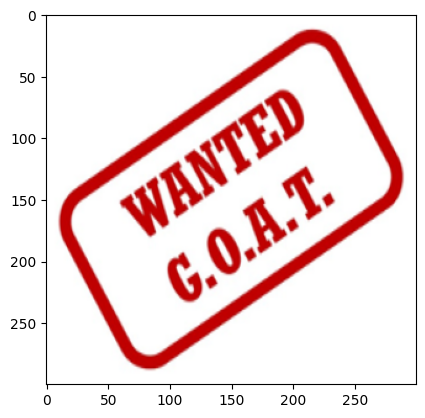

In [10]:
sample_img = cv2.imread("./data/ex_image.png")
sample_logo = cv2.imread("./data/ex_image_logo.png")

img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (1080, 720))
watermark = cv2.cvtColor(sample_logo, cv2.COLOR_BGR2RGB)
watermark = cv2.resize(watermark, (300, 300))

plt.imshow(watermark)

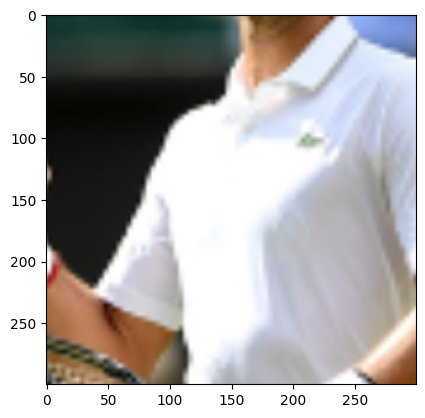

In [11]:
h, w, _ = watermark.shape

x_offset = 400
y_offset = 170

roi = img[y_offset:470, x_offset:700]
plt.imshow(roi)


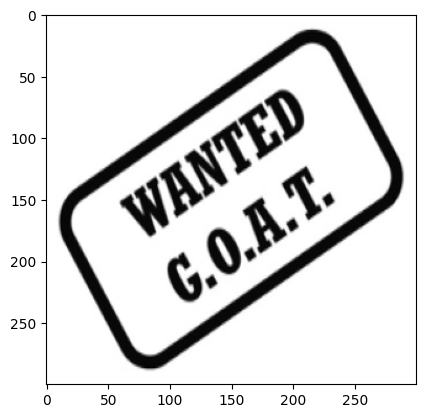

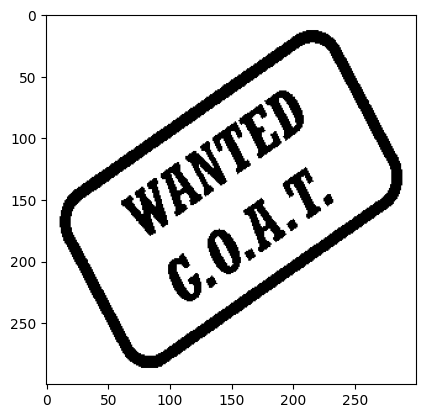

In [12]:
watermark_gray = cv2.cvtColor(watermark, cv2.COLOR_RGB2GRAY)

ret, mask = cv2.threshold(watermark_gray, 120, 255, cv2.THRESH_BINARY)

plt.imshow(watermark_gray, 'gray')

plt.show()
plt.imshow(mask, 'gray')
plt.show()

In [13]:
print(roi.shape)
print(mask.shape)

(300, 300, 3)
(300, 300)


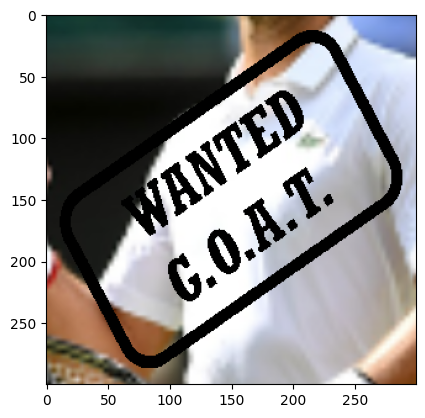

In [15]:
bg = cv2.bitwise_and(roi, roi, mask=mask)

plt.imshow(bg)

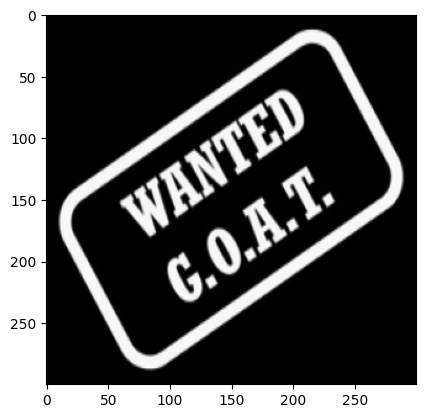

In [16]:
mask_inv = cv2.bitwise_not(watermark_gray)

plt.imshow(mask_inv, 'gray')


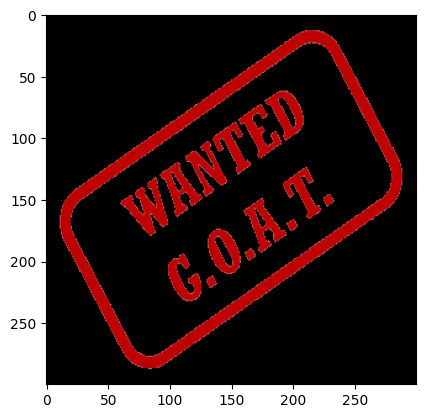

In [24]:
mask_inv_red = cv2.bitwise_and(watermark, watermark, mask=mask_inv)
plt.imshow(mask_inv_red)

_, mask_inv_ = cv2.threshold(mask_inv,120, 255, cv2.THRESH_BINARY)
mask_inv_red_ = cv2.bitwise_and(watermark, watermark, mask=mask_inv_)
plt.imshow(mask_inv_red_)

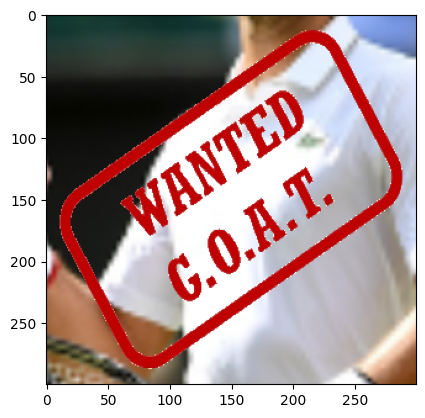

In [25]:
final_roi = cv2.add(bg, mask_inv_red_)

plt.imshow(final_roi)